### Spam Classifier: SMS

### Gegbruikte Networks:
- RNN - LSTM(Long short term memory.)


#### Load Libraries:

In [269]:
#%pip install tensorflow

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tqdm


from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
import matplotlib.pyplot as plt
 

In [190]:
# Variables
sen_length = 100

#### Load Data:

In [191]:
def load_data(path):
    text, label = [], []
    with open(path) as file:
        for line in file.readlines():
            tokens = line.split()
            label.append(tokens[0])
            text.append(' '.join(tokens[1:]))
    return  [text, label]


In [192]:
X, Y = load_data("D:\\AhmadAlDiboMap\\2025\\Python\\Curses\\tenserflow\\Data\\ham-spam\\data") # X = text, Y = label

word2int = {"ham": 0, "spam": 1}
int2word = {0: "ham", 1: "spam"}

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_Digit=tokenizer.texts_to_sequences(X)
X_Digit = np.array(X_Digit, dtype=object)
Y = np.array(Y)
X_Digit = pad_sequences(X_Digit, maxlen = sen_length) # padding='post' geef gaan om het worden met nummbers boven gaan.

# Y = [word2int[y] for y in Y] # hash it after using!
# Y= to_categorical(Y)

#### split and shuffle:

In [197]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_Digit, Y, test_size=0.25, random_state=7)

print("Xtrain: ", Xtrain.shape)
print("Xtest: ", Xtest.shape)
print("Ytrain: ", Ytrain.shape)
print("Ytest: ", Ytest.shape)

Xtrain:  (4180, 100)
Xtest:  (1394, 100)
Ytrain:  (4180, 2)
Ytest:  (1394, 2)


#### Generate Embedding:

In [210]:
def gemerate_Embedding(tokenizer, dim):
    embedding={}
    with open(f"D:\\AhmadAlDiboMap\\2025\\Python\\Curses\\tenserflow\\Data\\glove.6B\\glove.6B.{dim}d.txt", encoding="utf-8") as file:
        for line in tqdm.tqdm(file, "Reading the GloVe file"):
            tokens = line.split()
            word = tokens[0]
            vector = np.array(tokens[1:], dtype="float32")
            embedding[word] = vector
    
    wordI = tokenizer.word_index
    embedding_matrix = np.zeros((len(wordI)+1, dim))

    for word, index in wordI.items():
        vector = embedding.get(word)
        if vector is not None:
            embedding_matrix[index] = vector
    
    return embedding_matrix

In [221]:
embedding_matrix = gemerate_Embedding(tokenizer, 100)

Reading the GloVe file: 400000it [00:13, 30216.79it/s]


In [230]:
embedding_matrix[tokenizer.word_index["how"]]

array([-0.23769   ,  0.59391999,  0.58696997, -0.041788  , -0.86803001,
       -0.0051122 , -0.44929999, -0.027985  ,  0.065674  , -0.37900999,
        0.31174999,  0.20528001,  0.43099999, -0.30913001, -0.084523  ,
        0.056902  ,  0.34704   ,  0.32332   , -0.60413003,  0.23123001,
       -0.095476  , -0.50009   ,  0.024528  , -0.5819    ,  0.0075945 ,
       -0.13871001, -0.26416999, -0.7827    , -0.24023999,  0.081827  ,
       -0.1867    ,  0.95403999, -0.057412  ,  0.0089747 , -0.20491999,
        0.060902  , -0.018265  ,  0.33489999,  0.23729999, -0.17605001,
       -0.54013002, -0.32745001, -0.088963  , -0.38417   , -1.09029996,
        0.17027999, -0.019269  , -0.35687   , -0.0084772 , -0.81524998,
        0.23428001,  0.11118   ,  0.42355999,  1.11099994, -0.35534999,
       -2.38890004,  0.62029999, -0.16351999,  1.44500005,  0.58332998,
       -0.22946   ,  1.4375    , -0.063997  , -0.31511   ,  1.08749998,
        0.39221001,  0.73146999,  0.57235998, -0.050781  , -0.02

#### Build LSTM model:

In [ ]:

def build_model(embedding_matrix, lstm_units, sen_length):
    model = Sequential()
    model.add(Input(shape=(sen_length,)))  # 👈 Explicit input shape
    model.add(Embedding(input_dim=embedding_matrix.shape[0], 
                        output_dim=embedding_matrix.shape[1], 
                        weights=[embedding_matrix], 
                        trainable=False))
    model.add(LSTM(lstm_units, recurrent_dropout=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])
    model.summary()
    return model


In [250]:
model = build_model(embedding_matrix, 128, 100)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 100, 100)       │       901,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,018,806 (3.89 MB)

 Trainable params: 117,506 (459.01 KB)

 Non-trainable params: 901,300 (3.44 MB)

#### Train the model:

In [251]:
history = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), batch_size=64, epochs=10, verbose=1)

Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 353ms/step - accuracy: 0.9344 - loss: 0.1744 - val_accuracy: 0.9648 - val_loss: 0.1028
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.9713 - loss: 0.0895 - val_accuracy: 0.9720 - val_loss: 0.0878
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.9770 - loss: 0.0742 - val_accuracy: 0.9562 - val_loss: 0.1301
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.9782 - loss: 0.0638 - val_accuracy: 0.9756 - val_loss: 0.0721
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.9821 - loss: 0.0575 - val_accuracy: 0.9742 - val_loss: 0.0768
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.9856 - loss: 0.0506 - val_accuracy: 0.9756 - val_loss: 0.0752
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.9842 - loss: 0.0465 - val_accuracy: 0.9785 - val_loss: 0.0653
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.9866 - loss: 0.0411 - val_accu

In [272]:
import json


report = history.history
report.keys()
# model.save("lstm_model_1.h5")
# with open("training_history.json", "w") as f:
#     json.dump(history.history, f)

import pickle
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

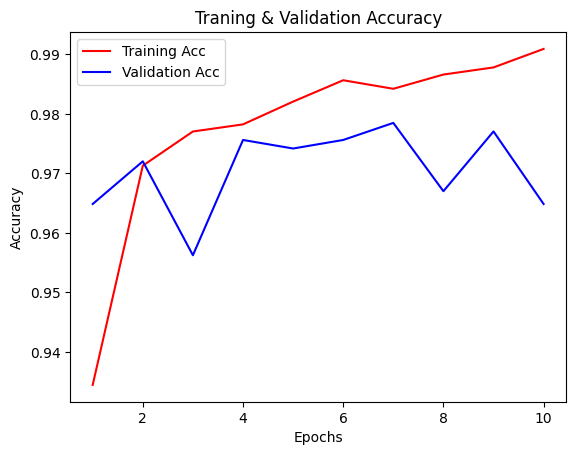

In [261]:
acc = report['accuracy']
val_acc = report["val_accuracy"]

epochs = range(1, 11)

plt.plot(epochs, acc, "r", label="Training Acc")
plt.plot(epochs, val_acc, 'b', label="Validation Acc")
plt.title("Traning & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

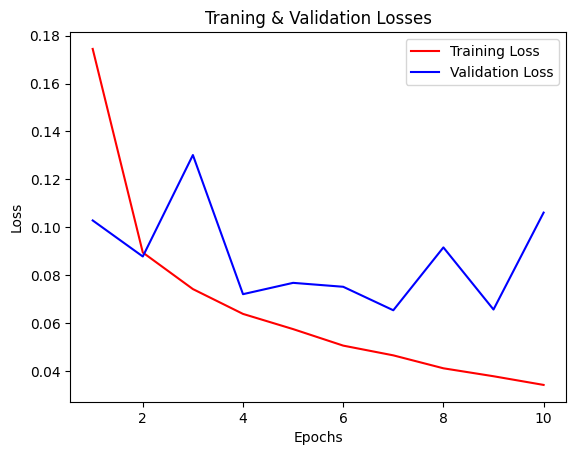

In [262]:
loss = report['loss']
val_loss = report["val_loss"]

epochs = range(1, 11)

plt.plot(epochs, loss, "r", label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Traning & Validation Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [265]:
# Results:

result = model.evaluate(Xtest, Ytest)

print(f"* Accuracy : {result[1] * 100:.2f}%")

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9648 - loss: 0.1061
* Accuracy : 96.48%


#### Testing

In [ ]:
def prediction(model, sms):
    seq= tokenizer.texts_to_sequences([sms])
    seq= pad_sequences(seq, maxlen=sen_length)

    predict = model.predict(seq)[0]
    return int2word[np.argmax(predict)]


In [ ]:

model = load_model('D:\\AhmadAlDiboMap\\2025\\Python\\Curses\\tenserflow\\code\\projects\\web_sms_classifier\\lstm_model_1.h5')
prediction(model, "Is that seriously how you spell his name?")
model.summary()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 100, 100)       │       901,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,018,808 (3.89 MB)

 Trainable params: 117,506 (459.01 KB)

 Non-trainable params: 901,300 (3.44 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
model.save